# Day-Ahead Prices — ENTSO-E Examples

Querying and visualizing day-ahead electricity market prices.

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from entsoe import Client, country_name

client = Client()

## 1. Day-Ahead Prices — France (1 week)

In [2]:
start = "2024-06-01"
end = "2024-06-08"

df_prices = client.prices.day_ahead(start, end, country="FR")
df_prices.head()

,timestamp,value,in_domain,out_domain,currency,price_unit
0,2024-05-31 22:00:00+00:00,4.99,FR,FR,EUR,MWH
1,2024-05-31 23:00:00+00:00,3.25,FR,FR,EUR,MWH
2,2024-06-01 01:00:00+00:00,1.23,FR,FR,EUR,MWH
3,2024-06-01 02:00:00+00:00,0.09,FR,FR,EUR,MWH
4,2024-06-01 03:00:00+00:00,3.25,FR,FR,EUR,MWH


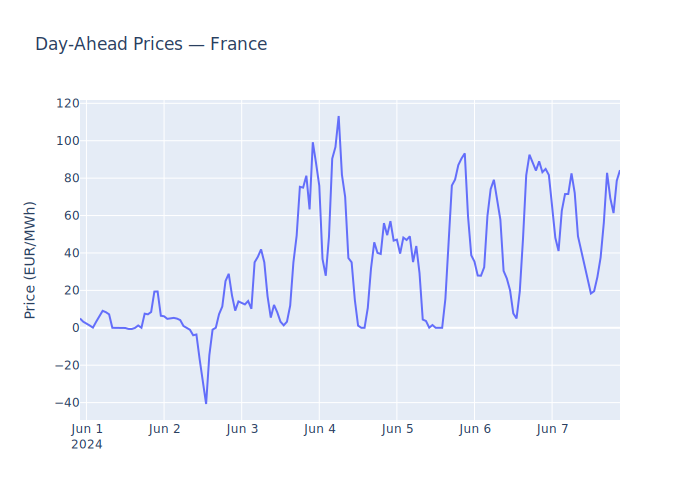

In [3]:
fig = px.line(
    df_prices, x="timestamp", y="value",
    title="Day-Ahead Prices — France",
    labels={"value": "Price (EUR/MWh)", "timestamp": ""},
)
fig.show()

## 2. Multi-Country Price Comparison

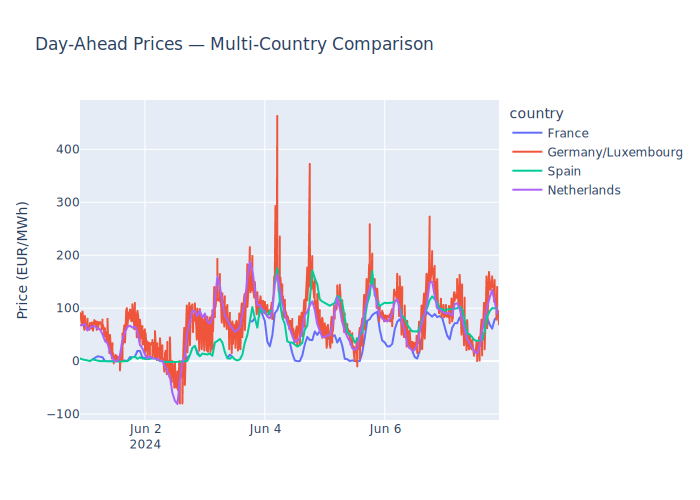

In [4]:
countries = ["FR", "DE_LU", "ES", "NL"]
frames = []
for code in countries:
    df = client.prices.day_ahead(start, end, country=code)
    df["country"] = country_name(code)
    frames.append(df)

df_multi = pd.concat(frames, ignore_index=True)

fig = px.line(
    df_multi, x="timestamp", y="value", color="country",
    title="Day-Ahead Prices — Multi-Country Comparison",
    labels={"value": "Price (EUR/MWh)", "timestamp": ""},
)
fig.show()

## 3. Price Distribution

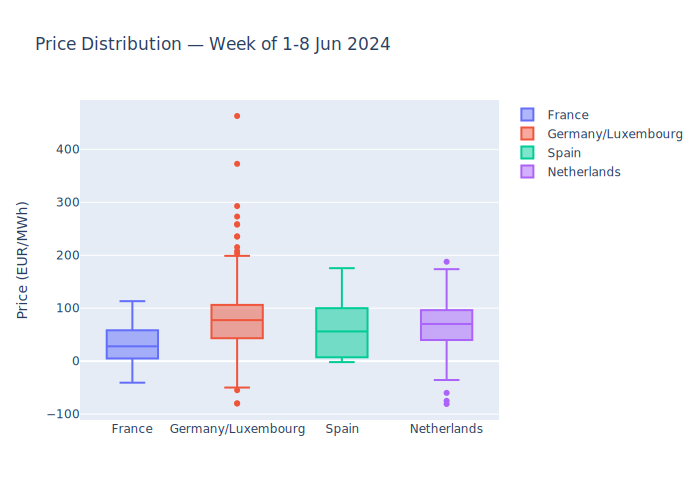

In [5]:
fig = px.box(
    df_multi, x="country", y="value", color="country",
    title="Price Distribution — Week of 1-8 Jun 2024",
    labels={"value": "Price (EUR/MWh)", "country": ""},
)
fig.show()

## 4. Hourly Price Heatmap — France (1 month)

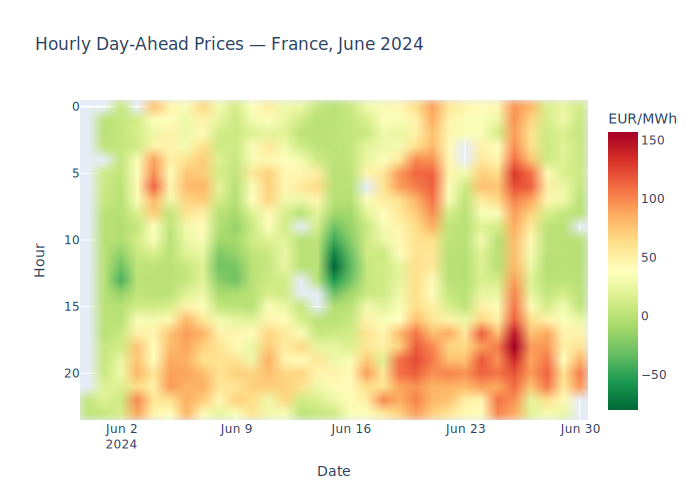

In [6]:
start = "2024-06-01"
end = "2024-07-01"

df_month = client.prices.day_ahead(start, end, country="FR")
df_month["hour"] = df_month["timestamp"].dt.hour
df_month["date"] = df_month["timestamp"].dt.date

pivot = df_month.pivot_table(index="hour", columns="date", values="value")

fig = px.imshow(
    pivot,
    title="Hourly Day-Ahead Prices — France, June 2024",
    labels=dict(x="Date", y="Hour", color="EUR/MWh"),
    aspect="auto",
    color_continuous_scale="RdYlGn_r",
)
fig.show()